# Table of Contents

<a id='top'></a>

1. [Read Dataset](#df)
2. [Additional Cleaning](#cleaning)
3. [Price Correlation](#price_correlation)
4. [All Data Correlation](#all_data_correlation)
5. [Price Distribution](#price_distribution)
6. [Stat Summary](#summary)
7. [Visuals](#visuals)
8. [Group Visuals](#group_visuals)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

<a id='df'></a>
### Read Dataset

In [17]:
data = pd.read_csv('./Part_2_Datasets/pillow_final.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      25202 non-null  float64
 1   listing_id                      25202 non-null  float64
 2   price                           25202 non-null  float64
 3   borough                         25202 non-null  object 
 4   neighbourhood                   25202 non-null  object 
 5   price_per_month                 25202 non-null  float64
 6   latitude                        25202 non-null  float64
 7   longitude                       25202 non-null  float64
 8   Unnamed: 0.1                    25209 non-null  int64  
 9   listing_id.1                    25209 non-null  int64  
 10  description                     25199 non-null  object 
 11  room_type                       25209 non-null  object 
 12  Unnamed: 0.2                    

In [18]:
free_listings = data['price'] == 0

free_listings

0        False
1        False
2        False
3        False
4        False
         ...  
25204    False
25205    False
25206    False
25207    False
25208    False
Name: price, Length: 25209, dtype: bool

In [19]:
free_listings.value_counts()

False    25209
Name: price, dtype: int64

<a id='cleaning'></a>
### Additional Cleaning

In [20]:
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'listing_id.1', 'Unnamed: 0.2', 'listing_id.2']

In [21]:
data.head()

,Unnamed: 0,listing_id,price,borough,neighbourhood,price_per_month,latitude,longitude,Unnamed: 0.1,listing_id.1,...,Unnamed: 0.2,listing_id.2,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365
0,0.0,2595.0,225.0,Manhattan,Midtown,6843.750000,40.75362,-73.98377,0,2595,...,0,2595,Jennifer,2019-05-21 00:00:00,1,45,0.38,2,355,10
1,1.0,3831.0,89.0,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976,1,3831,...,1,3831,LisaRoxanne,2019-07-05 00:00:00,1,270,4.64,1,194,171
2,2.0,5099.0,200.0,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500,2,5099,...,2,5099,Chris,2019-06-22 00:00:00,3,74,0.59,1,129,236
3,3.0,5178.0,79.0,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493,3,5178,...,3,5178,Shunichi,2019-06-24 00:00:00,2,430,3.47,1,220,145
4,4.0,5238.0,150.0,Manhattan,Chinatown,4562.500000,40.71344,-73.99037,4,5238,...,4,5238,Ben,2019-06-09 00:00:00,1,160,1.33,4,188,177


In [22]:
data = data.drop(columns_to_drop, axis=1)


In [23]:
data.head()

,listing_id,price,borough,neighbourhood,price_per_month,latitude,longitude,description,room_type,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365
0,2595.0,225.0,Manhattan,Midtown,6843.750000,40.75362,-73.98377,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21 00:00:00,1,45,0.38,2,355,10
1,3831.0,89.0,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05 00:00:00,1,270,4.64,1,194,171
2,5099.0,200.0,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22 00:00:00,3,74,0.59,1,129,236
3,5178.0,79.0,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24 00:00:00,2,430,3.47,1,220,145
4,5238.0,150.0,Manhattan,Chinatown,4562.500000,40.71344,-73.99037,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09 00:00:00,1,160,1.33,4,188,177


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      25202 non-null  float64
 1   price                           25202 non-null  float64
 2   borough                         25202 non-null  object 
 3   neighbourhood                   25202 non-null  object 
 4   price_per_month                 25202 non-null  float64
 5   latitude                        25202 non-null  float64
 6   longitude                       25202 non-null  float64
 7   description                     25199 non-null  object 
 8   room_type                       25209 non-null  object 
 9   host_name                       25201 non-null  object 
 10  last_review                     25209 non-null  object 
 11  minimum_nights                  25209 non-null  int64  
 12  number_of_reviews               

In [25]:
# Change the data type of the last_review column to datetime
data["last_review"] = pd.to_datetime(data["last_review"])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   listing_id                      25202 non-null  float64       
 1   price                           25202 non-null  float64       
 2   borough                         25202 non-null  object        
 3   neighbourhood                   25202 non-null  object        
 4   price_per_month                 25202 non-null  float64       
 5   latitude                        25202 non-null  float64       
 6   longitude                       25202 non-null  float64       
 7   description                     25199 non-null  object        
 8   room_type                       25209 non-null  object        
 9   host_name                       25201 non-null  object        
 10  last_review                     25209 non-null  datetime64[ns]
 11  mi

[Back To Top](#top)

# Key Findings

<a id='price_correlation'></a>
### Price Correlation

In [27]:
# Calculate the correlation coefficient
correlation_coefficient = data['booked_days_365'].corr(data['price'])
correlation_coefficient

-0.0796388397666691

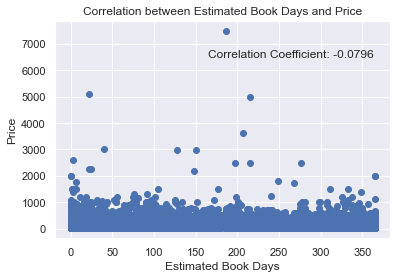

In [28]:
# Calculate the correlation coefficient
correlation_coefficient = data['booked_days_365'].corr(data['price'])

x = data['booked_days_365']
y = data['price']

# Plot the scatter plot
plt.scatter(x, y)

# Add title, labels, and correlation coefficient text
plt.title('Correlation between Estimated Book Days and Price')
plt.xlabel('Estimated Book Days')
plt.ylabel('Price')
plt.text(data['booked_days_365'].max() - 200, data['price'].max() - 1000, f'Correlation Coefficient: {correlation_coefficient:.4f}')

plt.show()

In [29]:
correlation_coefficient

-0.0796388397666691

[Back To Top](#top)

<a id='all_data_correlation'></a>
### Data Correlation

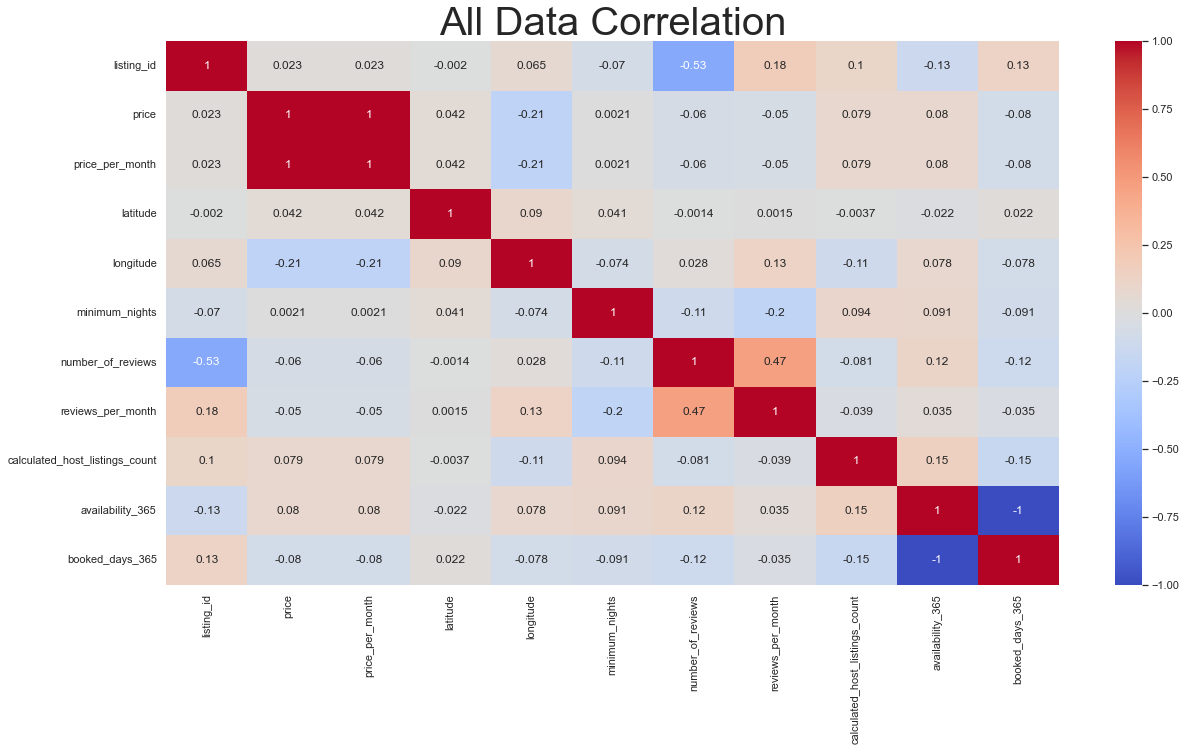

In [30]:
fig, ax = plt.subplots(figsize=[20, 10])

# Create a correlation matrix
corr = data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title("All Data Correlation", fontsize=40)

plt.show()

[Back To Top](#top)

<a id='price_distribution'></a>
### Price Distribution

Price Mean: $ 141.82
Price Median: $ 105.0
Price Max: $ 7500.0
Price Mode: $ 150.0
Price Range: $ 7490.0
All Data Interquartile range:  106.0
All Data Standard deviation:  147.35
Number of outliers:  1326


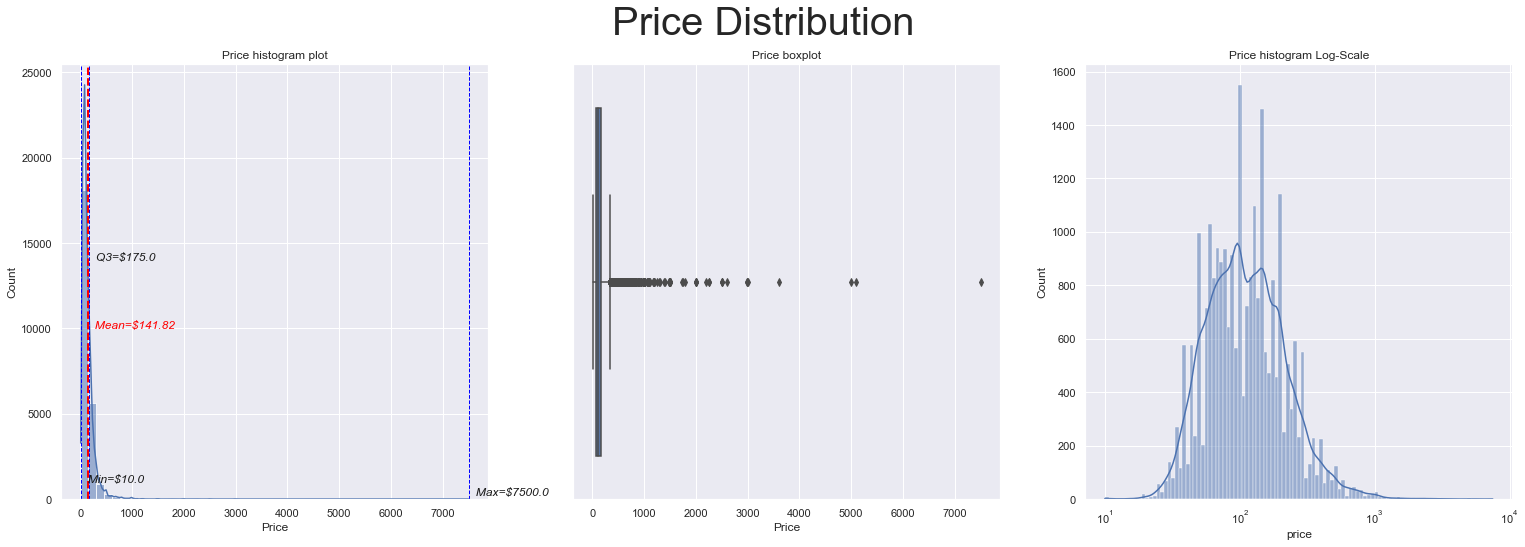

In [31]:
# creating 4 subplots axes[0], axes[1], axes[2] 
base_color = sns.color_palette()[0]
fig, ax = plt.subplots(1,3,figsize=[26, 8])

price_mean = np.round(data["price"].mean(), 2)
price_min = np.round(data["price"].min(), 2)
price_max = np.round(data["price"].max(), 2)

# main title:
fig.suptitle("Price Distribution", fontsize=40)

# creating a histogram
sns.histplot(data=data, x="price", bins=50, kde=True, ax = ax[0], color=base_color);
# creating a box plot
sns.boxplot(data=data, x="price", ax=ax[1]);
# creating a log-scale histogram
sns.histplot(data=data, x='price', kde=True, log_scale=True, ax=ax[2]);

# titles and labels
ax[0].set_title('Price histogram plot')
ax[1].set_title('Price boxplot')
ax[2].set_title('Price histogram Log-Scale')
ax[0].set_xlabel("Price");
ax[1].set_xlabel("Price");

# Measures of central tendency
print("Price Mean: $", np.round(price_mean, 2))
print("Price Median: $", np.round(data["price"].median(), 2))
print("Price Max: $", np.round(price_max, 2))
print("Price Mode: $", data["price"].mode()[0])

# Measures of dispersion
print("Price Range: $", price_max - price_min)
print("All Data Interquartile range: ", data["price"].quantile(0.75) - data["price"].quantile(0.25))
print("All Data Standard deviation: ", np.round(data["price"].std(), 2))

#Outlier detection
price_q1 = data["price"].quantile(0.25)
price_q3 = data["price"].quantile(0.75)
iqr = price_q3 - price_q1
all_data_outliers = data[(data["price"] < (price_q1 - 1.5 * iqr)) | (data["price"] > (price_q3 + 1.5 * iqr))]
print("Number of outliers: ", all_data_outliers.shape[0])

ax[0].axvline(price_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(price_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(price_q3, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(price_max, color="blue", linestyle="dashed", linewidth=1)

ax[0].text(
    x=price_mean,
    y=10000,
    s=f"  Mean=${price_mean}",
    style="italic",
    color='red'
)

ax[0].text(
    x=price_min,
    y=1000,
    s=f"  Min=${price_min}",
    style="italic",
    color='k'
)
ax[0].text(
    x=price_q3,
    y=14000,
    s=f"  Q3=${price_q3}",
    style="italic",
    color='k'
)

ax[0].text(
    x=price_max,
    y=200,
    s=f"  Max=${price_max}",
    style="italic",
    color='k'
)
plt.show()

[Back To Top](#top)

### More Key Findings can be found in the link below.

https://public.tableau.com/app/profile/lex.romo/viz/MasteryProject2Questions/Question3

